In [14]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [6]:
messages= pd.read_csv('SMSSpamCollection', sep= '\t', names= ['label', 'message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

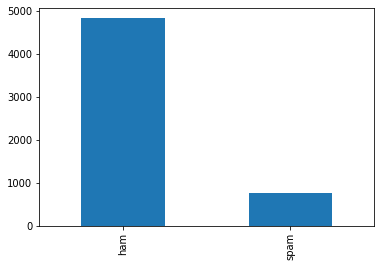

In [9]:
messages['label'].value_counts().plot.bar()

data set is skewed as expected. as most of the sms are non-spam

Data preprocessing and data cleaning

In [10]:
stemmer= PorterStemmer()

In [15]:
def process(sentence):
    sentence= sentence.lower()
    sentence= re.sub('[^a-zA-Z]', ' ', sentence)
    words= sentence.split()
    words= [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentence= ' '.join(words)
    return sentence

In [16]:
corpus= messages['message'].apply(lambda x: process(x))

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(max_features= 5000)

In [31]:
X= vectorizer.fit_transform(corpus).toarray()

In [32]:
print('shape of the matrix:\t', X.shape)
np.unique(X)

shape of the matrix:	 (5572, 5000)


array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 15, 18], dtype=int64)

In [33]:
target= pd.get_dummies(messages['label'], drop_first= True)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, target)

In [38]:
model= MultinomialNB()
model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [39]:
predicted_class= model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [44]:
c_matrix= confusion_matrix(y_test, predicted_class)

In [45]:
c_matrix

array([[1180,   25],
       [   9,  179]], dtype=int64)

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score= f1_score(y_test, predicted_class)

In [48]:
f1_score

0.913265306122449